# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [4]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<AxesSubplot:>

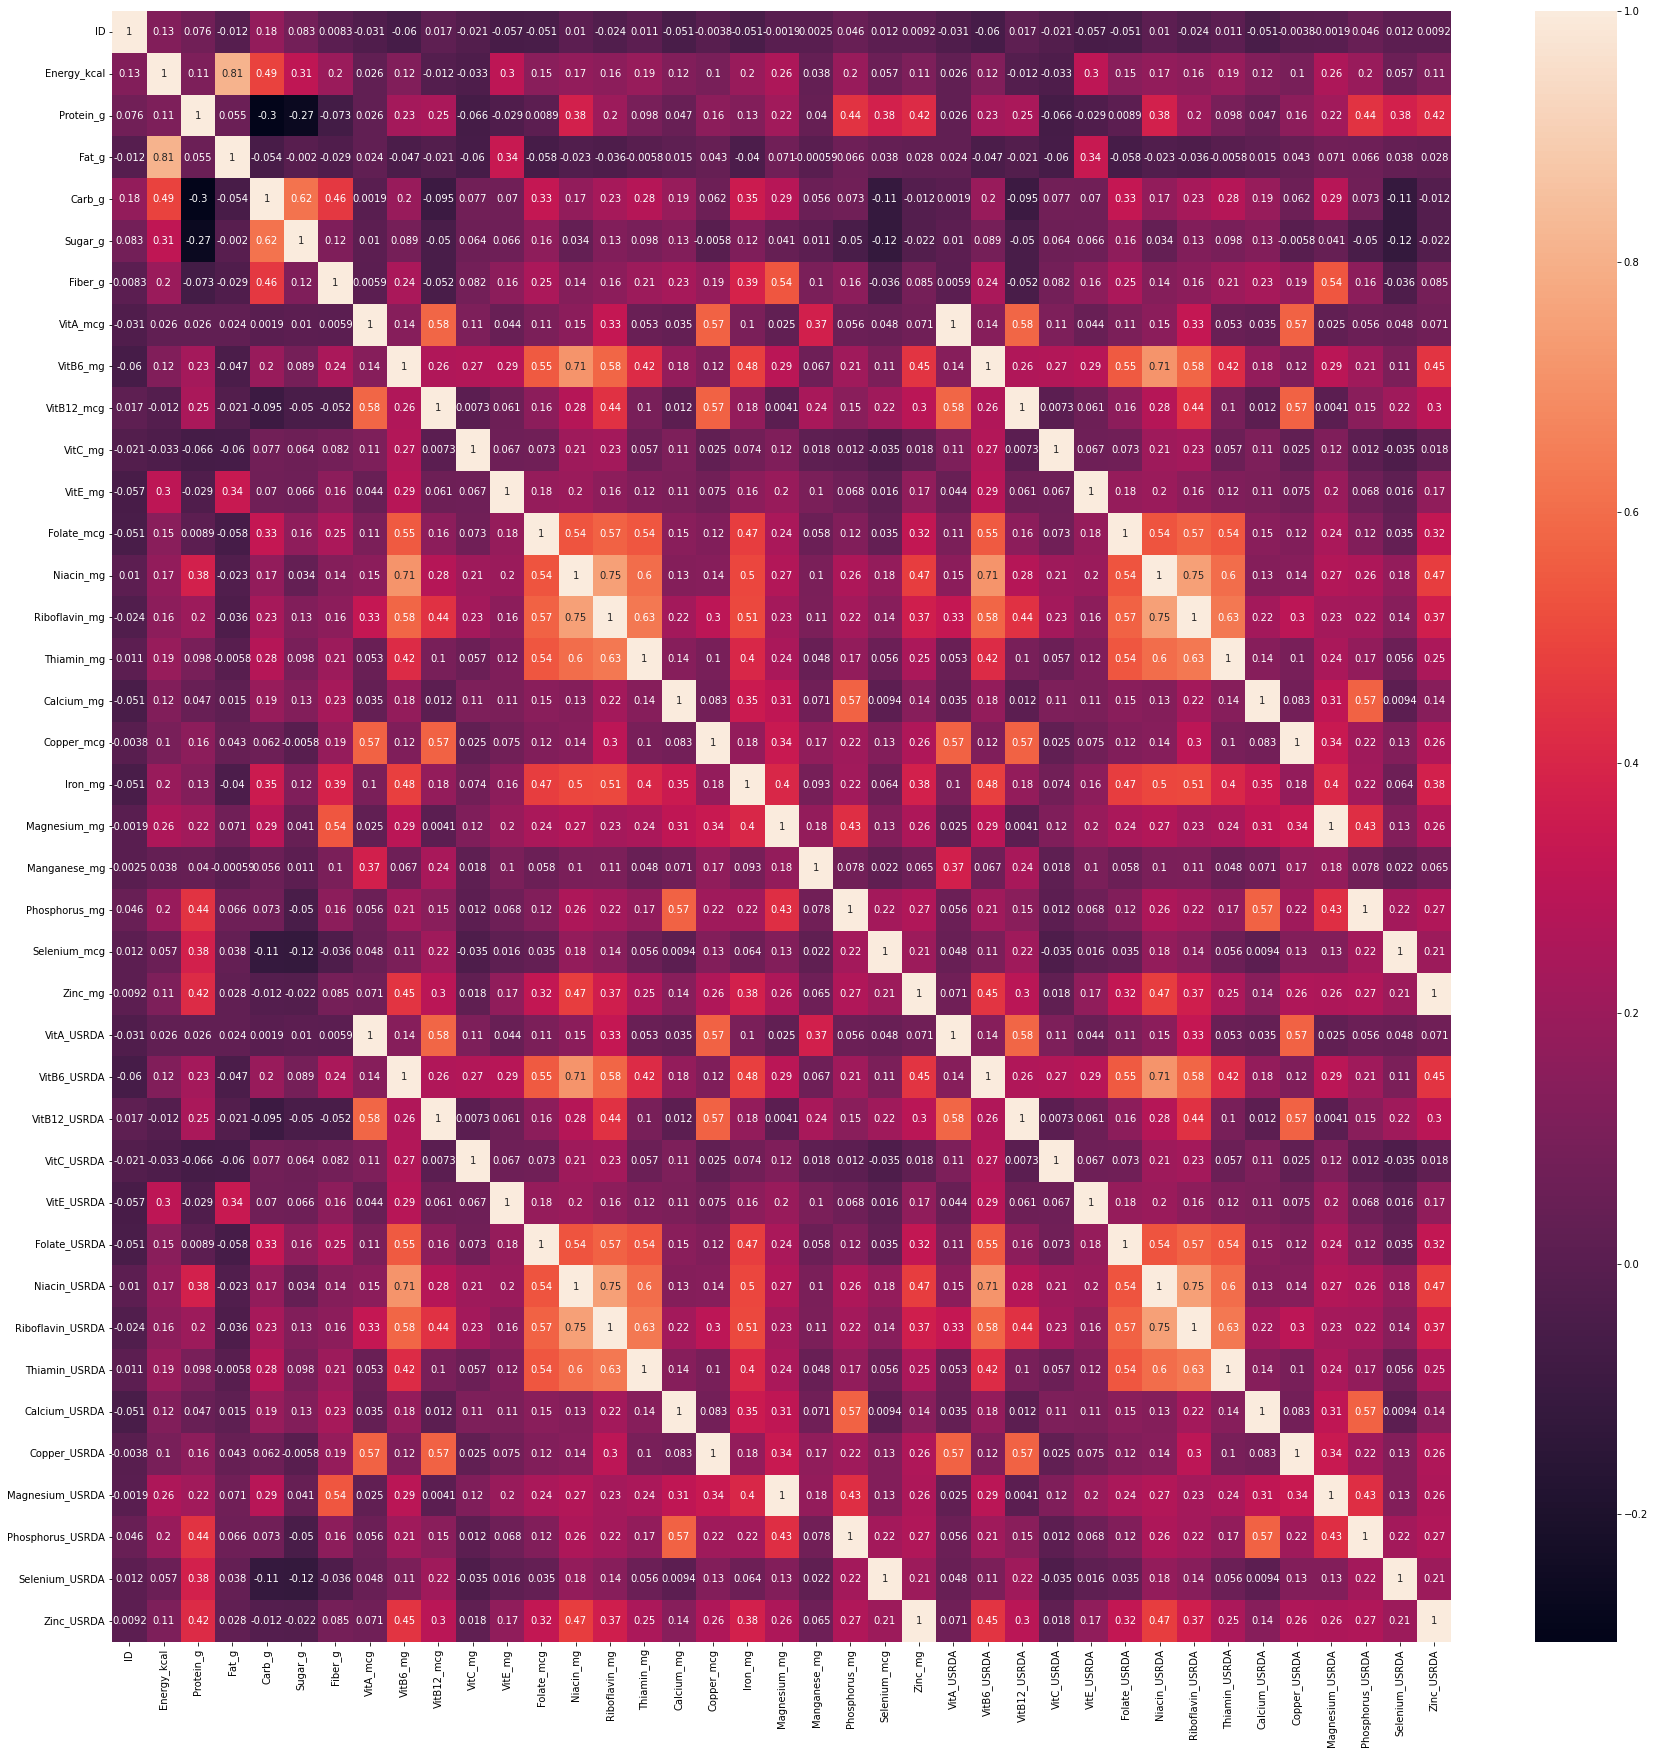

In [5]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [8]:
columnas = pd.Series(df.columns)
df.drop(columns=columnas[columnas.str.contains('USRDA')].values, inplace=True)
len(df.columns)

30

In [ ]:
# df = df.iloc[:,0:-15]

### Variables no numéricas
Elimina las variables de texto del dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

In [10]:
df = df.iloc[:,7:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

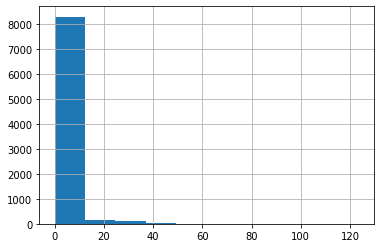

In [11]:
df['Iron_mg'].hist();

In [12]:
for i in df.columns:
    df[i] = np.log1p(df[i])

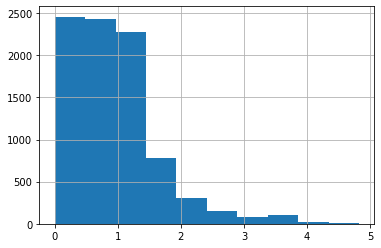

In [15]:
df['Iron_mg'].hist();

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [14]:
df_scaled.shape

(8618, 23)

In [44]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(df_scaled)
X_pca.shape

(8618, 23)

In [45]:
pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [-5.22265271e-01, -7.90226661e-02, -4.73911046e-01,
        -2.10881292e-01, -1.8

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [19]:
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

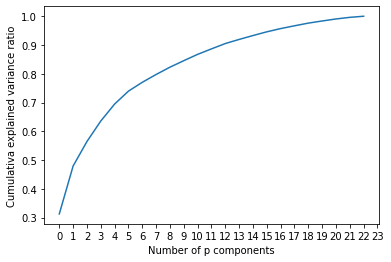

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of p components")
plt.ylabel("Cumulativa explained variance ratio")
plt.xticks(np.arange(0,24));

Nos quedamos con 6 PCs

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [46]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(df_scaled)
X_pca6.shape

(8618, 6)

In [48]:
df_pca_comp = pd.DataFrame(
    data = pca6.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)
df_pca_comp

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005436,-0.242246,-0.150171,0.439121,0.320254,0.388057,0.109657,0.007444,-0.236852,0.256139,...,0.072565,0.160924,0.204122,0.136708,0.124536,0.112674,0.259182,-0.061640,-0.225184,-0.159530
PC3,-0.522289,-0.079015,-0.473899,-0.210897,-0.184192,-0.136147,0.292300,0.159079,0.186033,0.394590,...,0.096983,-0.057936,0.093716,0.040043,-0.039028,0.073294,-0.029160,0.016421,0.062498,0.039190
PC4,0.064285,-0.132058,0.032863,0.038068,0.281219,-0.081310,0.086514,0.312467,0.232621,0.153359,...,0.352788,0.307058,-0.208687,-0.270576,0.124263,-0.319864,-0.327220,-0.230510,-0.164403,-0.026447
PC5,0.148194,-0.074928,0.335195,-0.095134,0.089766,-0.196001,0.544523,-0.072146,0.078869,0.127823,...,-0.046739,-0.220026,0.212829,0.008530,-0.181904,-0.044446,-0.074253,0.011117,0.095230,-0.052021
PC6,-0.056818,-0.129985,0.032106,-0.196003,-0.232431,0.057348,-0.221200,0.151287,0.056150,0.104710,...,-0.032186,-0.001050,-0.440523,0.404917,0.041479,-0.096137,0.353680,-0.273327,-0.079743,0.095280


In [60]:
df_pca_comp.loc['PC1']

Energy_kcal      0.198045
Protein_g        0.277927
Fat_g            0.148024
Carb_g           0.002898
Sugar_g         -0.026550
Fiber_g          0.074429
VitA_mcg         0.079993
VitB6_mg         0.263414
VitB12_mcg       0.215148
VitC_mg         -0.024158
VitE_mg          0.080658
Folate_mcg       0.195834
Niacin_mg        0.303455
Riboflavin_mg    0.266736
Thiamin_mg       0.229400
Calcium_mg       0.154403
Copper_mcg       0.188309
Iron_mg          0.281809
Magnesium_mg     0.275671
Manganese_mg     0.139021
Phosphorus_mg    0.295597
Selenium_mcg     0.247376
Zinc_mg          0.298978
Name: PC1, dtype: float64

In [54]:
df_pca_comp.loc['PC1'][df_pca_comp.loc['PC1']==df_pca_comp.loc['PC1'].max()]

Niacin_mg    0.303455
Name: PC1, dtype: float64

In [28]:
df_final = pd.DataFrame(X_pca6, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'])
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968026,-1.463923,0.270964,4.067116,0.307796
1,-2.106485,-0.909509,-1.480515,0.263345,4.032594,0.349196
2,-3.267830,-1.138437,-2.042428,1.175499,4.072019,1.327064
3,1.525965,-1.264110,0.136074,-0.929874,2.430857,-2.094253
4,1.240712,-1.204125,0.004689,-1.192004,2.691790,-2.341134


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [30]:
df_0 = pd.read_csv('data/nndb_flat.csv')
df_0.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [33]:
df_final_merged = pd.merge(df_0[['FoodGroup','ShortDescrip']], df_final, left_index=True, right_index=True)
df_final_merged.head()

,FoodGroup,ShortDescrip,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,"BUTTER,WITH SALT",-2.139032,-0.968026,-1.463923,0.270964,4.067116,0.307796
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT",-2.106485,-0.909509,-1.480515,0.263345,4.032594,0.349196
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS",-3.267830,-1.138437,-2.042428,1.175499,4.072019,1.327064
3,Dairy and Egg Products,"CHEESE,BLUE",1.525965,-1.264110,0.136074,-0.929874,2.430857,-2.094253
4,Dairy and Egg Products,"CHEESE,BRICK",1.240712,-1.204125,0.004689,-1.192004,2.691790,-2.341134


In [34]:
for column in df_final_merged[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6']]:
    df_final_merged.sort_values(by=column, ascending=False, inplace=True)
    print(column)
    print(df_final_merged[['FoodGroup','ShortDescrip']][:3])
    print('-'*50)

PC1
              FoodGroup                                       ShortDescrip
1832  Breakfast Cereals  CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...
1863  Breakfast Cereals          CEREALS RTE,GENERAL MILLS,WHL GRAIN TOTAL
2025  Breakfast Cereals          CEREALS RTE,RALSTON ENR WHEAT BRAN FLAKES
--------------------------------------------------
PC2
                              FoodGroup  \
4190                          Beverages   
3577  Vegetables and Vegetable Products   
3320  Vegetables and Vegetable Products   

                                           ShortDescrip  
4190  BEVERAGES,UNILEVER,SLIMFAST SHAKE MIX,HI PROT,...  
3577                       PEPPERS,SWT,RED,FREEZE-DRIED  
3320                       PEPPERS,SWT,GRN,FREEZE-DRIED  
--------------------------------------------------
PC3
                          FoodGroup  \
8537                      Beverages   
4355                      Beverages   
5277  Lamb, Veal, and Game Products   

                        

In [43]:
np.abs(df_final_merged.groupby(['FoodGroup'])[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6']].mean()).sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6
FoodGroup,,,,,,
Breakfast Cereals,4.020261,2.748074,0.236141,2.265088,0.907412,0.108192
Fats and Oils,3.268544,0.770827,2.333625,1.045200,2.634028,2.055130
Beverages,3.259459,0.425883,0.958297,0.545568,0.455541,0.653674
"Soups, Sauces, and Gravies",3.173748,0.069459,0.213385,0.150299,0.328170,0.267062
Nut and Seed Products,3.120685,2.267553,1.241200,2.093182,0.084383,1.764156
Fruits and Fruit Juices,2.923483,1.615719,0.915612,0.186643,0.139378,0.102736
Spices and Herbs,2.562116,3.647739,0.361599,1.602735,0.231687,1.460624
Sweets,1.902101,1.265902,1.209031,0.052443,0.329372,0.554502
Snacks,1.874997,1.962739,1.081980,0.497509,0.442818,0.373582
